In [32]:
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import scipy as ss
import scipy.stats
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.decomposition import PCA

import visualization_functions as vis

# col1 = "#f93c3c"
# col2 = "#009a7f"
# col3 = "#9fa8ab"
# col5 = "#00490c"
# col4 = "#f4d895"

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"

colors = [col1, col2, col3, col4, col5]


counts_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
                    "data/ref/study_design.csv"

figures_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/figures/"


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]

wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Merge"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Merge"

thirty = "30 min"
zero = "0 min"

samples = {"Case5":"{} | {}".format(wt_L, thirty),
           "Case6":"{} | {}".format(wt_L, zero),
            "Case7":"{} | {} | {}".format(wt, bh_mut, thirty), 
          "Case8":"{} | {} | {}".format(mut, bh_mut, thirty),
          "Case9": "{} | {}".format(mut_L, zero),
          "Case10": "{} | {}".format(mut_L, thirty),
          "Case11": "{} | {} | {}".format(mut, bh_mut, zero),
           "Case12":"{} | {} | {}".format(wt, bh_mut, zero),
          "Case13": "{} | {} | {}".format(wt, bh_wt,zero ),
           "Case14":"{} | {} | {}".format(wt, bh_wt, thirty)}
meta

,lane.ID,group.ID,time.point,strain.ID,position,RIN
63630,L1,Case1,0'',HI,L-HI,NaN
63631,L1,Case1,0'',HI,L-HI,NaN
63632,L1,Case1,0'',HI,L-HI,NaN
63633,L1,Case2,4',HI,L-HI,NaN
63634,L1,Case2,4',HI,L-HI,NaN
63635,L1,Case2,4',HI,L-HI,NaN
63636,L1,Case3,0'',Mix,L-9C,NaN
63638,L1,Case3,0'',Mix,L-9C,NaN
63639,L1,Case4,4',Mix,L-9C,NaN
63641,L1,Case4,4',Mix,L-9C,NaN


In [33]:
meta = meta[meta["lane.ID"]!="L1"]
rpkms = rpkms[meta.index]
rpkms_norm =  rpkms.apply(vis.invnorm)
meta["samples"] = [samples[i] for i in meta["group.ID"]]
meta["time.point"] = meta["time.point"].str.replace("0''", "0 min")
meta["time.point"] = meta["time.point"].str.replace("4'", "4 hrs")
meta['position'] = meta['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [34]:
meta

,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,L2,Case5,30 min,HI,Merge,6.8,Merge | 30 min
76068,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76069,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76070,L2,Case6,0 min,HI,Merge,6.4,Merge | 0 min
76071,L2,Case6,0 min,HI,Merge,4.5,Merge | 0 min
76072,L2,Case6,0 min,HI,Merge,6.1,Merge | 0 min
76073,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT | Behind Dienes Line | 30 min
76074,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT | Behind Dienes Line | 30 min
76075,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT | Behind Dienes Line | 30 min
76076,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1 | Behind Dienes Line | 30 min


In [35]:
line_meta = meta[meta["group.ID"].isin(["Case6", "Case5","Case9", "Case10"])]
line_meta
line_rpkms = rpkms_norm[line_meta.index]
pDf, pc1_var, pc2_var = vis.findTwoComponents(line_rpkms, line_meta)

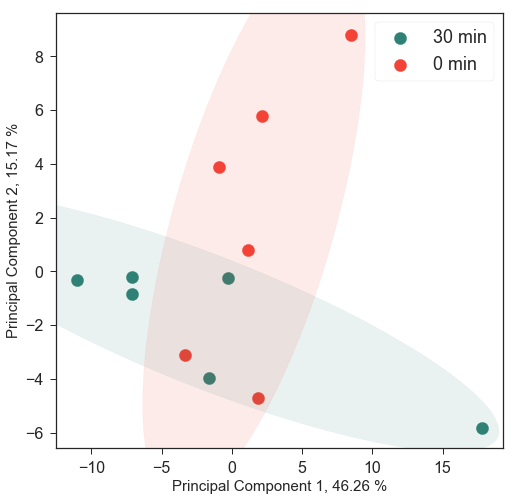

In [36]:
fn = os.path.join(figures_folder, '2018-07-02-proteus-figure_3a.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "time.point", c= [col4, col1], nameby="", title = "", 
              filename = fn, el=True)

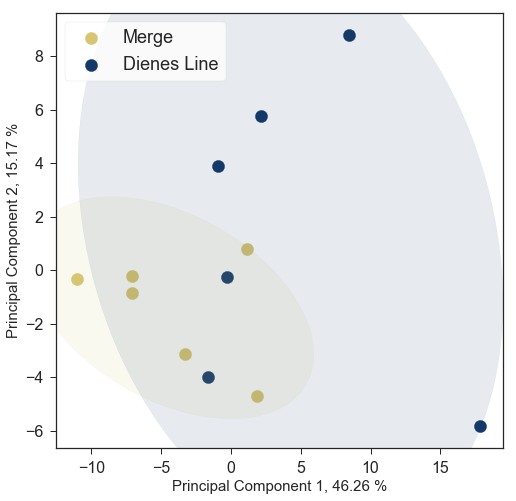

In [37]:
fn = os.path.join(figures_folder, '2018-07-02-proteus-figure_3b.png')
fig = vis.plotPCA(pDf, pc1_var, pc2_var, "position", c= [col2, col5], nameby="", title = "", 
              filename = fn, el=True)

In [9]:
# de_file = "/Users/annasintsova/git_repos/proteus/analysis/DESeq/data/2018-04-24-Dienes-line-time.csv"
# de_file_swarm = "/Users/annasintsova/git_repos/proteus/analysis/DESeq/data/2018-04-24-Swarm-line-time.csv"
# log2change_sw = pd.read_csv(de_file_swarm, index_col=0)
# log2change_dl = pd.read_csv(de_file, index_col=0)
# #log2change_dl.rename(columns ={"log2FoldChange":"log2FC_DL"}, inplace=True)
# log2change_dl

# #log2change_sw.rename(columns ={"log2FoldChange":"log2FC_SW"}, inplace=True)
# L2FC_new = pd.DataFrame({ wt_L:log2change_sw["log2FoldChange"], mut_L:log2change_dl["log2FoldChange"]}).dropna()
# L2FC_new


,Dienes Line,Swarm Front
PMI0229,1.143135,-1.223666
PMI1425,2.219405,-1.966218
PMI1426,2.536457,-1.631109
PMI1427,1.598964,-1.050086
PMI1428,1.559769,-1.156050
PMI1429,1.358556,-1.262715
PMI1430,1.166837,-1.262843
PMI1548,1.045110,-1.380181


In [38]:
de_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
          "tables/2018-06-28-dienes-line-0-30_edited.csv"
de_file_sw = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
             "tables/2018-06-28-wt-swarm-front-0-30_edited.csv"
log2change_sw = pd.read_csv(de_file_sw, index_col=0)
log2change_dl = pd.read_csv(de_file, index_col=0)

L2FC_new = pd.DataFrame({ wt_L:log2change_sw["Log2 Fold Change"], mut_L:log2change_dl["Log2 Fold Change"],
                          "gene_name":log2change_dl["Gene Name"]}).dropna()
L2FC_new
name_it = [ "$\it{}$".format(g) for g in L2FC_new.gene_name]
full_name =["{} ({})".format(i, n) for i, n in zip(L2FC_new.index, name_it)]
L2FC_new["full_name"] = full_name
L2FC_new_it = L2FC_new[[mut_L, wt_L]]
L2FC_new_it.set_index(L2FC_new.full_name, inplace=True)
L2FC_new_it.index.name=""
L2FC_new_it

,Dienes Line,Merge
,,
PMI1425 ($\ithmuR1$),2.219405,-1.966218
PMI1426 ($\ithmuR2$),2.536457,-1.631109
PMI1427 ($\ithmuS$),1.598964,-1.050086
PMI1428 ($\ithmuT$),1.559769,-1.156050
PMI1429 ($\ithmuU$),1.358556,-1.262715
PMI1430 ($\ithmuV$),1.166837,-1.262843


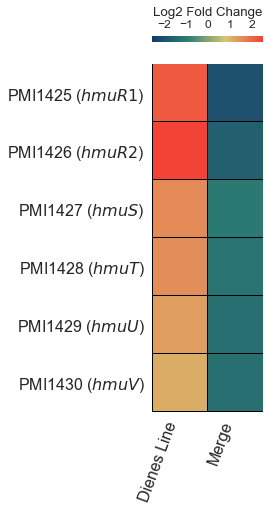

In [39]:
my_cmap = my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
fig = plt.figure(figsize=(2,8))
sns.set(font_scale=1.2)
ax = sns.heatmap(L2FC_new_it, cmap = my_cmap, 
                 linewidths=0.5, linecolor='black',
                 cbar_kws = {'use_gridspec':False,'location':"top",
                            'label': 'Log2 Fold Change', });
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 16, rotation = 70, ha= "right");
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16, rotation = 360);

fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_3c.png"), dpi=300, bbox_inches="tight")

In [40]:
mk_file = "/Users/annasintsova/git_repos/proteus/analysis/mutant_killing/rpkm/kan_rpkms.csv"
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk.index = [i.strip("S") for i in mk.index]
mk = mk.join(line_meta, how = "inner")
#mk["samples"] = [samples[i] for i in mk["group.ID"]]
mk

,Kan RPKM,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,0.53,L2,Case5,30 min,HI,Merge,6.8,Merge | 30 min
76068,0.74,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76069,1.57,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76070,1.47,L2,Case6,0 min,HI,Merge,6.4,Merge | 0 min
76071,4.25,L2,Case6,0 min,HI,Merge,4.5,Merge | 0 min
76072,1.62,L2,Case6,0 min,HI,Merge,6.1,Merge | 0 min
76079,111.53,L2,Case9,0 min,Mix,Dienes Line,7.4,Dienes Line | 0 min
76080,129.75,L2,Case9,0 min,Mix,Dienes Line,7.3,Dienes Line | 0 min
76081,78.52,L2,Case9,0 min,Mix,Dienes Line,6.8,Dienes Line | 0 min
76082,258.08,L2,Case10,30 min,Mix,Dienes Line,6.2,Dienes Line | 30 min


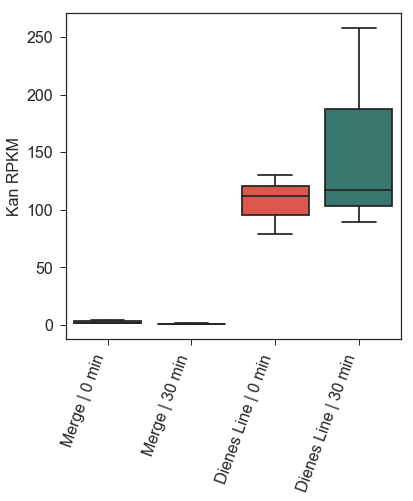

In [43]:
fig = plt.figure(figsize = (6,6))
sns.set_style("ticks")
order = [samples["Case6"], samples["Case5"], samples["Case9"], samples["Case10"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=[col2, col5, col1, col4], order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel(ax.get_ylabel(), fontsize=16)
fig.savefig(os.path.join(figures_folder, "2018-07-02-proteus_rnaseq_figure_3d.png"), dpi=300, bbox_inches="tight")